# Costi Riscossione Tributi

Questa analisi ha come obiettivo approfondire come i costi per **la riscossione dei tributi** si distribuisce in Italia. In particolare:
- Analizzeremo la sua distribuzione normalizzata per il numero di contribuenti per le varie Regioni.
- Cercheremo di capire quali sono le top/last regioni/province/comuni per spesa riscossione tributi

In [1]:
import numpy as np
import pandas as pd

# set the max number of columns to display
pd.options.display.max_columns = 98

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import plotly.offline as py
import plotly.plotly as py_on
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from IPython.display import Image
from IPython.display import display

Il dataset preso in analisi contiene informazioni sui **costi riscossione tributi per 2010-2013 (OpenCivitas)**  e i **redditi dei contribuenti (Mef dati Irpef)** per lo stesso periodo. In totale abbiamo 26800 osservazioni distribuite per anno:

In [2]:
fattore = 'costo riscossione tributi'
fattore_descrizione = 'Costo Riscossione Tributi'

tot_contribuenti = 'tot_contribuenti'

fattore_normalizzato = 'spesa_tributi_per_contribuenti'

In [3]:
df = pd.read_csv('./data/opencivitas_spesa_storica_dati_irpef.csv')
print(df.shape)
print(df.columns)

(26799, 86)
Index(['ANNO', 'COMUNE_CAT_COD', 'costo riscossione tributi',
       'tot costo riscossione tributi', 'costo ufficio tecnico',
       'tot costo ufficio tecnico', 'costo anagrafe, stato civile',
       'tot costo anagrafe, stato civile', 'costo altri servizi',
       'tot costo altri servizi', 'costo polizia locale',
       'tot costo polizia locale', 'costo istruzione', 'tot costo istruzione',
       'costo viabilita'', 'tot costo viabilita'', 'costo trasporti',
       'tot costo trasporti', 'costo territorio', 'tot costo territorio',
       'costo ambiente', 'tot costo ambiente', 'costo sociale',
       'tot costo sociale', 'costo asili nido', 'tot costo asili nido',
       'costo spesa totale', 'tot costo spesa totale', 'Codice Nazionale',
       'Denominazione Italiana', 'Codice Catastale', 'Ufficio Catasto Terreni',
       'Ufficio Catasto Fabbricati', 'Codice Conservatoria',
       'Addizionale comunale dovuta Ammontare',
       'Addizionale comunale dovuta Frequenza'

Distribuzione delle osservazioni Anno e Comuni per cui abbiamo rilevazioni per l'anno in questione.
Si può osservare che la distribuzione delle osservazioni rimane costante nell'intervallo in esame.
Considerando che il numero di comuni italiani è 7.982, si stanno analizzando l'84% della popolazione totale. 

In [4]:
df.groupby(['ANNO'])[fattore].count()

ANNO
2010    6702
2011    6699
2012    6699
2013    6699
Name: costo riscossione tributi, dtype: int64

-----------------------

In [5]:
df_regione = df.groupby(df.Regione).sum()
df_regione[fattore_normalizzato] = (df_regione[fattore] / df_regione[tot_contribuenti])

In [6]:
data_pie = [
    go.Pie(labels = df_regione.index, values=df_regione[fattore]),
]

layout_pie = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro'
)

fig_pie = go.Figure(data=data_pie, layout=layout_pie)

data_bar = go.Bar(x=df_regione.index, y=df_regione[fattore_normalizzato], name = 'spesa media per regione')


media_costo_tot = df_regione[fattore_normalizzato].mean()
data_scatter = go.Scatter(x=df_regione.index, y=[media_costo_tot for i in range(len(df_regione))], name = 'spesa media nazionale')

data = [data_bar, data_scatter]


layout_bar = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Euro per Contribuente',
    )
)

fig_bar = go.Figure(data=data, layout=layout_bar)

In [7]:
data_pie_contribuenti = [
    go.Pie(labels = df_regione.index, values=df_regione["tot_contribuenti"]),
]

layout_pie_contribuenti = go.Layout(
    title='Contribuenti'
)

fig_pie_contribuenti = go.Figure(data=data_pie_contribuenti, layout=layout_pie_contribuenti)


media_italiana_contribuenti = df_regione["tot_contribuenti"].mean()

data_contribuenti = [
    go.Bar(x=df_regione.index, y=df_regione[tot_contribuenti], name='numero contribuenti per regione'),  
    go.Scatter(x=df_regione.index, y=[media_italiana_contribuenti for i in range(len(df_regione))], name='media italiana numero contribuenti')
]


layout_bar_contribuenti = go.Layout(
    title='Numero Totale Contribuenti per Regione',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Numero Contribuenti',
    )
)

fig_bar_contribuenti = go.Figure(data=data_contribuenti, layout=layout_bar_contribuenti)

## Costo Riscossione Tributi per Regione

Per prima cosa analizziamo quali sono le regioni che hanno maggiori costi per la riscossione delle tasse.
Possiamo osservare che per il periodo 2010-2013 la Liguria sia la regione con li maggior costo procapite per la riscossione dei tributi. La tabella sotto mostra il dettaglio dei costi. 

Mentre, il grafico a torta fa vedere la distribuzione percentuale di questi costi sul totale delle regioni presenti nel dataset.

In [8]:
df_regione.sort_values("spesa_tributi_per_contribuenti", ascending=False).head()

,ANNO,costo riscossione tributi,tot costo riscossione tributi,costo ufficio tecnico,tot costo ufficio tecnico,"costo anagrafe, stato civile","tot costo anagrafe, stato civile",costo altri servizi,tot costo altri servizi,costo polizia locale,tot costo polizia locale,costo istruzione,tot costo istruzione,costo viabilita',tot costo viabilita',costo trasporti,tot costo trasporti,costo territorio,tot costo territorio,costo ambiente,tot costo ambiente,costo sociale,tot costo sociale,costo asili nido,tot costo asili nido,costo spesa totale,tot costo spesa totale,Addizionale comunale dovuta Ammontare,Addizionale comunale dovuta Frequenza,Addizionale regionale dovuta Ammontare,Addizionale regionale dovuta Frequenza,Anno di imposta,Codice Istat Comune,Codice Istat Regione,Imposta netta Ammontare,Imposta netta Frequenza,Numero contribuenti,Reddito complessivo da 0 a 10000 euro Ammontare,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Ammontare,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Ammontare,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Ammontare,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Ammontare,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Ammontare,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo oltre 120000 euro Ammontare,Reddito complessivo oltre 120000 euro Frequenza,Reddito da fabbricati Ammontare,Reddito da fabbricati Frequenza,Reddito da lavoro dipendente e assimilati Ammontare,Reddito da lavoro dipendente e assimilati Frequenza,Reddito da pensione Ammontare,Reddito da pensione Frequenza,Reddito imponibile Ammontare,Reddito imponibile Frequenza,Reddito imponibile addizionale Ammontare,Reddito imponibile addizionale Frequenza,Reddito imponibile addizionale IRPEF Ammontare,Reddito imponibile addizionale IRPEF Frequenza,tot_contribuenti,Reddito lavoro autonomo Ammontare,Reddito lavoro autonomo Frequenza,Reddito da partecipazione Ammontare,Reddito da partecipazione Frequenza,Reddito imprenditore ordinario Ammontare,Reddito imprenditore ordinario Frequenza,Reddito imprenditore semplificata Ammontare,Reddito imprenditore semplificata Frequenza,Cod Istat,Reddito minore o uguale a zero Frequenza,Reddito minore o uguale a zero Ammontare,spesa_tributi_per_contribuenti
Regione,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LAZIO,3041388,3.168019e+08,8.688880e+11,5.716576e+08,1.561587e+12,2.704210e+08,8.758288e+11,3.366483e+09,9.033465e+12,2.049437e+09,4.036053e+12,2.307503e+09,5.366810e+12,1.170081e+09,3.575083e+12,1.643651e+09,1.424151e+12,9.876832e+08,2.586042e+12,4.992385e+09,1.248671e+13,2.592058e+09,7.223208e+12,1.205375e+09,1.750050e+12,1.047213e+10,2.539583e+13,1.214945e+09,5466692.0,2.643004e+09,5684494.0,3041388.0,43925320.0,9072.0,3.516809e+10,5878799.0,7728190.0,2.200914e+10,4723586.0,2.452278e+10,1966958.0,8.373783e+10,4147597.0,1.163050e+11,3322276.0,2.521806e+10,395788.0,2.836402e+10,308759.0,3.341094e+10,151267.0,6.128523e+09,1503690.0,8.979876e+10,3934377.0,4.842269e+10,2621282.0,1.615144e+11,7425489.0,1.531381e+11,5686127.0,1.516947e+11,5771056.0,15088932.0,8.156609e+09,225798.0,4.483684e+09,276446.0,628153052.0,24679.0,4.168198e+09,273015.0,87850640.0,72701.0,-712292787.0,20.995650
MOLISE,1094256,1.793921e+07,3.126158e+11,3.421319e+07,5.618408e+11,1.853914e+07,3.151130e+11,1.679047e+08,3.250136e+12,4.727739e+07,1.452125e+12,6.281326e+07,1.930916e+12,6.936311e+07,1.286273e+12,6.267626e+06,5.123930e+11,5.237064e+07,9.304278e+11,1.348824e+08,4.492573e+12,7.042110e+07,2.598826e+12,8.707969e+06,6.296477e+11,3.310870e+08,9.137124e+12,3.111734e+07,249309.0,1.147230e+08,275953.0,1094256.0,21545896.0,3808.0,1.053451e+09,283946.0,437651.0,1.806945e+09,381150.0,1.642958e+09,134263.0,4.262883e+09,214548.0,3.901221e+09,116589.0,5.820986e+0

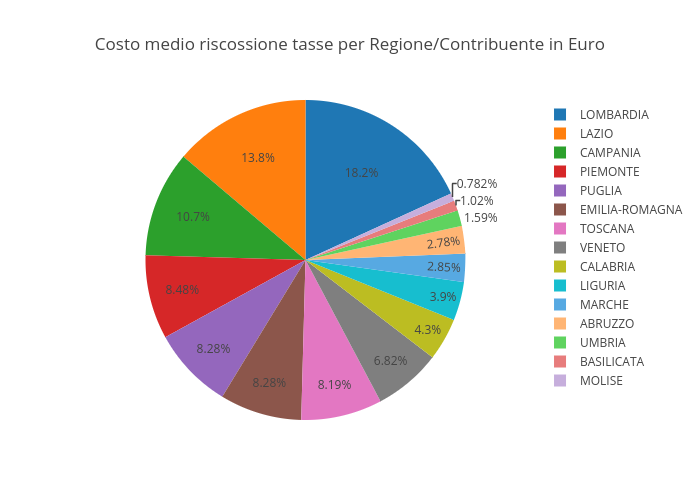

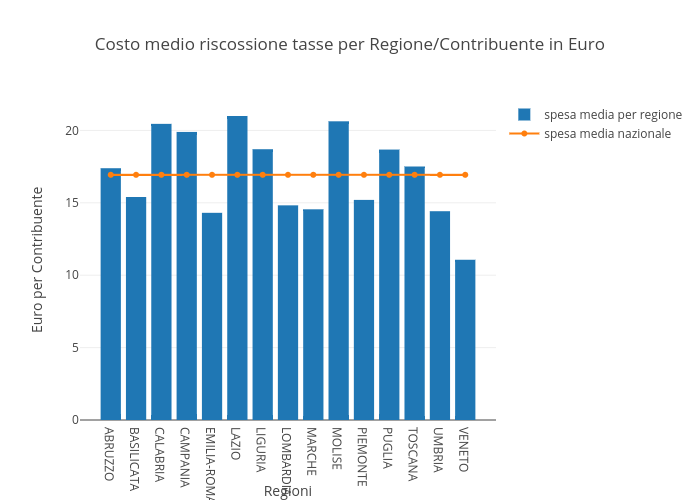

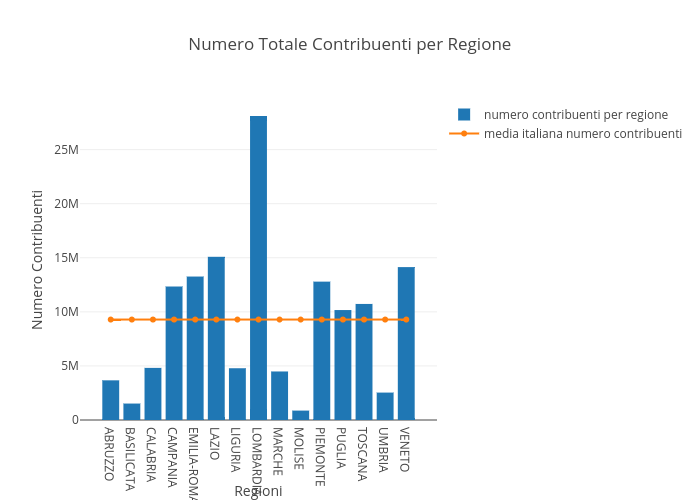

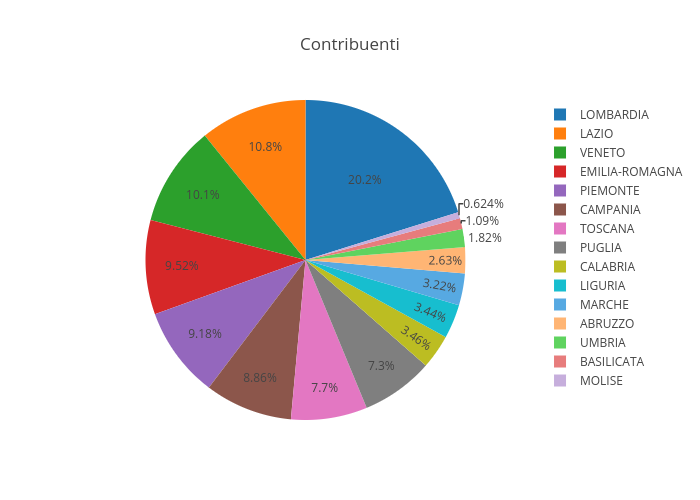

In [9]:
py.iplot(fig_pie)
py.iplot(fig_bar)
py.iplot(fig_bar_contribuenti)
py.iplot(fig_pie_contribuenti)

fig_pie_path = 'imgs/tributi_regione_pie.png'
fig_bar_path = 'imgs/tributi_regione_bar.png'
fig_bar_contribuenti_path = 'imgs/contribuenti_regione_bar.png'
fig_pie_contribuenti_path = 'imgs/contribuenti_regione_pie.png'

py_on.image.save_as(fig_pie, filename=fig_pie_path)
py_on.image.save_as(fig_bar, filename=fig_bar_path)
py_on.image.save_as(fig_bar_contribuenti, filename=fig_bar_contribuenti_path)
py_on.image.save_as(fig_pie_contribuenti, filename=fig_pie_contribuenti_path)

x = Image(fig_pie_path)
y = Image(fig_bar_path)
z = Image(fig_bar_contribuenti_path)
w = Image(fig_pie_contribuenti_path)
display(x,y,z,w)

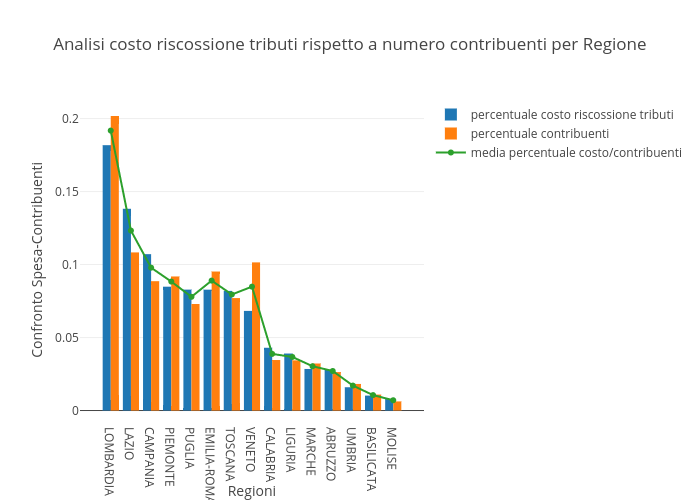

In [10]:
df_regione2 = df_regione
sum_costo_medio = df_regione2[fattore].sum()
sum_numero_contribuenti = df_regione2[tot_contribuenti].sum()
df_regione2.loc[:, fattore] /= sum_costo_medio 
df_regione2.loc[:, tot_contribuenti] /= sum_numero_contribuenti

df_regione2 = df_regione2.sort_values(fattore, ascending=False)


#df_regione2 = df_regione2.sort_values(fattore, ascending=False)
media = (df_regione2[fattore] + df_regione2[tot_contribuenti]) / 2

data = [go.Bar(x=df_regione2.index, y=df_regione2[fattore], name = 'percentuale costo riscossione tributi'),
        go.Bar(x=df_regione2.index, y=df_regione2[tot_contribuenti], name = 'percentuale contribuenti'),
        go.Scatter(x=df_regione2.index, y=media, name = 'media percentuale costo/contribuenti')
           ]

layout_bar_contribuenti_spesa = go.Layout(
    title='Analisi costo riscossione tributi rispetto a numero contribuenti per Regione',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Confronto Spesa-Contribuenti',
    )
)

fig_bar_spesa_contribuenti = go.Figure(data=data, layout=layout_bar_contribuenti_spesa)

py.iplot(fig_bar_spesa_contribuenti)

fig_bar_spesa_contribuenti_path = 'imgs/spesa_contribuenti_regione_bar.png'

py_on.image.save_as(fig_bar_spesa_contribuenti, filename=fig_bar_spesa_contribuenti_path)

i = Image(fig_bar_spesa_contribuenti_path)
display(i)

Dal precedente grafico si può osservare come la regione più efficiente sia il Veneto avente il 10% dei contribuenti italiani che concorrono al 7% della spesa italiana. Al contrario la regione piu inefficiente risulta il Lazio avente il 12% dei contribuenti italiani che concorrono al 14% della spesa italiana.
Si elencano di seguito le differenze per ogni regione:

In [11]:
(df_regione[fattore] - df_regione[tot_contribuenti]).sort_values()

Regione
VENETO           -0.033233
LOMBARDIA        -0.019992
EMILIA-ROMAGNA   -0.012424
PIEMONTE         -0.007004
MARCHE           -0.003728
UMBRIA           -0.002252
BASILICATA       -0.000700
ABRUZZO           0.001493
MOLISE            0.001583
LIGURIA           0.004686
TOSCANA           0.004923
CALABRIA          0.008401
PUGLIA            0.009850
CAMPANIA          0.018518
LAZIO             0.029878
dtype: float64

Si elencano di seguito le regioni italiane in rapporto al costo medio di riscossione tasse per contribuente. In particolare, si può oseervare come il Veneto sia la regione con il più basso costo di riscossione tasse per contribuente (i.e. 11.07 euro per contribuente), seguito da Emilia Romagna (14.30 euro), Umbria (14.42 euro), Marche(14.55 euro) e Lombardia(14.82 euro). Troviamo invece in coda Calabria (20.45 euro), Molise (20.63 euro) e Lazio (21 euro).

In [12]:
df_regione["spesa_tributi_per_contribuenti"].sort_values(ascending=True)

Regione
VENETO            11.066791
EMILIA-ROMAGNA    14.308776
UMBRIA            14.420277
MARCHE            14.551420
LOMBARDIA         14.825448
PIEMONTE          15.200880
BASILICATA        15.401712
ABRUZZO           17.389323
TOSCANA           17.507800
PUGLIA            18.677372
LIGURIA           18.700978
CAMPANIA          19.895792
CALABRIA          20.452651
MOLISE            20.629573
LAZIO             20.995650
Name: spesa_tributi_per_contribuenti, dtype: float64

## Distribuzione Redditi

Analizziamo ora come sia distribuita la contribuzione fiscale da parte dei contribuenti.
In particolare, analizziamo le diverse fonti di reddito dal punto di vista di:

1. distribuzione contribuenti
2. distribuzione introiti

Qui sotto consideriamo quali sono i fattori per l'analisi:

In [13]:
fattori = [c for c in df.columns.values if c.startswith('Reddito') and 'Frequenza' in c]


Dai quali selezioniamo i redditi da lavoro

In [14]:
frequenza_reddito_scaglioni = [
 ('Regione','Reddito minore o uguale a zero Frequenza', '0M'),
 ('Regione','Reddito complessivo da 0 a 10000 euro Frequenza', '0-10M'),
 ('Regione','Reddito complessivo da 10000 a 15000 euro Frequenza', '10-15M'),
 ('Regione','Reddito complessivo da 15000 a 26000 euro Frequenza', '15-26M'),
 ('Regione','Reddito complessivo da 26000 a 55000 euro Frequenza', '26-55M'),
 ('Regione','Reddito complessivo da 55000 a 75000 euro Frequenza', '55-75M'),
 ('Regione','Reddito complessivo da 75000 a 120000 euro Frequenza', '75-120M'),
 ('Regione','Reddito complessivo oltre 120000 euro Frequenza', '>120M'),
]

fattori_frequenza = [v for _, v, _ in frequenza_reddito_scaglioni]

### Frequenza contribuenti per fascia economica

Consideriamo di seguito la distribuzione dei contribuenti organizzati per regione. 
In particolare, analizzeremo i campi in *fattori_frequenza* normalizzati per il numero totale di contribuenti.

Come prima attività utilizziamo un algoritmo di clustering (HDBSCAN) per individuare gruppi di regioni simili in termini di fasce economiche. Il clustering restituisce 2 gruppi (più un gruppo *rumore*):

- Cluster 0: Composto da tutte le regioni del sud: [ABRUZZO, BASILICATA, CAMPANIA, MOLISE, PUGLIA];
- Cluster 1: Composto da tutte le regioni del nord: [EMILIA-ROMAGNA, LIGURIA, MARCHE, PIEMONTE, TOSCANA, UMBRIA, VENETO];
- Cluster -1 (cluster rumore): Composto da LAZIO e LOMBARDIA;


### Contribuzione per fascia di reddito in percentuale

In [15]:
fattori_frequenza

['Reddito minore o uguale a zero Frequenza',
 'Reddito complessivo da 0 a 10000 euro Frequenza',
 'Reddito complessivo da 10000 a 15000 euro Frequenza',
 'Reddito complessivo da 15000 a 26000 euro Frequenza',
 'Reddito complessivo da 26000 a 55000 euro Frequenza',
 'Reddito complessivo da 55000 a 75000 euro Frequenza',
 'Reddito complessivo da 75000 a 120000 euro Frequenza',
 'Reddito complessivo oltre 120000 euro Frequenza']

In [16]:
df_regione_sum = df.groupby(df.Regione).sum()

df_regione_fattoriFrequenza = df_regione_sum[fattori_frequenza]
df_regione_totContribuenti = df_regione_sum.tot_contribuenti

frequenza_redditi_percentuale = df_regione_fattoriFrequenza.div(df_regione_totContribuenti, axis='index')
frequenza_redditi_percentuale = frequenza_redditi_percentuale.reset_index()
df_regione_totContribuenti = df_regione_totContribuenti.reset_index()

In [17]:
frequenza_reddito_scaglioni

[('Regione', 'Reddito minore o uguale a zero Frequenza', '0M'),
 ('Regione', 'Reddito complessivo da 0 a 10000 euro Frequenza', '0-10M'),
 ('Regione', 'Reddito complessivo da 10000 a 15000 euro Frequenza', '10-15M'),
 ('Regione', 'Reddito complessivo da 15000 a 26000 euro Frequenza', '15-26M'),
 ('Regione', 'Reddito complessivo da 26000 a 55000 euro Frequenza', '26-55M'),
 ('Regione', 'Reddito complessivo da 55000 a 75000 euro Frequenza', '55-75M'),
 ('Regione',
  'Reddito complessivo da 75000 a 120000 euro Frequenza',
  '75-120M'),
 ('Regione', 'Reddito complessivo oltre 120000 euro Frequenza', '>120M')]

In [18]:
media = dict( [(x[1], frequenza_redditi_percentuale[x[1]].mean()) for x in frequenza_reddito_scaglioni])
media

{'Reddito complessivo da 0 a 10000 euro Frequenza': 0.33964639266755997,
 'Reddito complessivo da 10000 a 15000 euro Frequenza': 0.15363162269910377,
 'Reddito complessivo da 15000 a 26000 euro Frequenza': 0.29755310671803764,
 'Reddito complessivo da 26000 a 55000 euro Frequenza': 0.16963572283171477,
 'Reddito complessivo da 55000 a 75000 euro Frequenza': 0.016779390155291837,
 'Reddito complessivo da 75000 a 120000 euro Frequenza': 0.012391442173139264,
 'Reddito complessivo oltre 120000 euro Frequenza': 0.005170169880813685,
 'Reddito minore o uguale a zero Frequenza': 0.005192152874339054}

In [19]:

#df_regione_sum[fattori_frequenza].head()

#import numpy as np 
#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=3, verbose=1, perplexity=4, n_iter=1500)
#tsne_results = tsne.fit_transform(df_regione_sum[fattori_frequenza].values)

#df_tsne = pd.DataFrame(tsne_results)

#scatter = [go.Scatter3d(
#    name = "TSNE",
#    x=df_tsne[0],
#    y=df_tsne[1],
#    z=df_tsne[2],
#    text=df_regione_sum.index,
#    mode='markers',
#    marker=dict(
#        size=4,
#        line=dict(
#            #color='rgba(217, 217, 217, 0.14)',
#            width=1
#        )#,opacity=0.8
#    )
#)]

#fig = go.Figure( data=scatter)
#py.iplot(fig)

In [20]:
media = dict( [(x[1], frequenza_redditi_percentuale[x[1]].mean()) for x in frequenza_reddito_scaglioni])

data_frequenza = []
for x,y,name in frequenza_reddito_scaglioni:
    
    val_it = media.get(y)
    
    bar = go.Bar(
        x = frequenza_redditi_percentuale[x].append(pd.Series(['ITALIA'])),
        y = frequenza_redditi_percentuale[y].append(pd.Series([val_it])),
        name = name
    )
    
    
    data_frequenza.append(bar)    
    
layout = go.Layout(
    title='Distribuzione per Fasce di Contribuzione - Frequenza',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Percentuale',
    )
)

fig = go.Figure(layout=layout, data=data_frequenza)
py.iplot(fig)

#fig_path = 'imgs/percentuale_contribuenti_reddito.png'
#py_on.image.save_as(fig, filename=fig_path)
#x = Image(fig_path)
#display(x)

In [21]:
from sklearn import cluster
import hdbscan
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X_regioni =  frequenza_redditi_percentuale.set_index('Regione')
X = StandardScaler().fit_transform(X_regioni)

In [22]:
X_regioni_and_Italia = X_regioni.copy()
X_regioni_and_Italia.loc["ITALIA"] = media
X_regioni_and_Italia = StandardScaler().fit_transform(X_regioni_and_Italia)
#X_regioni_and_Italia

In [23]:

model_hdbscan = hdbscan.HDBSCAN(min_samples=2).fit(X)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels_hdbscan = model_hdbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_hdbscan))


Estimated number of clusters: 2
Silhouette Coefficient: 0.457


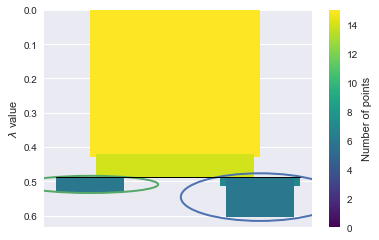

In [24]:
model_hdbscan.condensed_tree_.plot(select_clusters=True,selection_palette=sns.color_palette('deep', 8))

#### Evaluate Clustering quality
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [25]:
model_kmeans = cluster.KMeans(n_clusters=3).fit(X)
labels_kmeans = model_kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_kmeans)) - (1 if -1 in labels_kmeans else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_kmeans))


Estimated number of clusters: 3
Silhouette Coefficient: 0.457


In [26]:
#import numpy as np 
#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=3, verbose=1, perplexity=4, n_iter=1500)
#tsne_results = tsne.fit_transform(X)

#df_tsne = pd.DataFrame(tsne_results)

#scatter = [go.Scatter3d(
#    name = "TSNE",
#    x=df_tsne[0],
#    y=df_tsne[1],
#    z=df_tsne[2],
#    text=df_regione_sum.index,
#    mode='markers',
#    marker=dict(
#        size=4,
#        color=labels_kmeans,
#        line=dict(
#            color=labels_kmeans,
#            width=1
#        )#,opacity=0.8
#    )
#)]

#fig = go.Figure( data=scatter)
#py.iplot(fig)

In [27]:
import numpy as np 
from sklearn.manifold import TSNE

tsne_labels = labels_hdbscan

tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=1500)
tsne_results = tsne.fit_transform(X_regioni)

df_tsne = pd.DataFrame(tsne_results)

scatter = [go.Scatter(
    name = "TSNE",
    x=df_tsne[0],
    y=df_tsne[1],
    text=df_regione_sum.index,
    mode='markers',
    marker=dict(
        size=4,
        color=tsne_labels,
        line=dict(
            color=tsne_labels,
            width=1
        )#,opacity=0.8
    )
)]

fig = go.Figure( data=scatter)
py.iplot(fig)

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 15 samples in 0.002s...
[t-SNE] Computed neighbors for 15 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 15 / 15
[t-SNE] Mean sigma: 0.033886
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.861473
[t-SNE] Error after 1350 iterations: 0.048321


In [28]:
df_regione_clusters = X_regioni.assign(Clusters=pd.Series(labels_hdbscan).values)

for x in frequenza_reddito_scaglioni:
    print(x[1], df_regione_clusters[x[1]].sum())

Reddito minore o uguale a zero Frequenza 0.0778822931151
Reddito complessivo da 0 a 10000 euro Frequenza 5.09469589001
Reddito complessivo da 10000 a 15000 euro Frequenza 2.30447434049
Reddito complessivo da 15000 a 26000 euro Frequenza 4.46329660077
Reddito complessivo da 26000 a 55000 euro Frequenza 2.54453584248
Reddito complessivo da 55000 a 75000 euro Frequenza 0.251690852329
Reddito complessivo da 75000 a 120000 euro Frequenza 0.185871632597
Reddito complessivo oltre 120000 euro Frequenza 0.0775525482122


In [29]:
media = dict( [(x[1], df_regione_clusters[x[1]].mean()) for x in frequenza_reddito_scaglioni])

for label in set(labels_hdbscan):
    sub_df = df_regione_clusters[df_regione_clusters["Clusters"] == label]
    
    data_frequenza = []
    
    for x,y,name in frequenza_reddito_scaglioni:
    
        val_it = media.get(y)

        bar = go.Bar(
            x = np.concatenate((sub_df.index.values, pd.Series(['ITALIA']))),
            y = sub_df[y].append(pd.Series([val_it])),
            name = name
        )


        data_frequenza.append(bar)    
    
    title = 'Distribuzione per Fasce di Contribuzione - Frequenza, Cluster-' + str(label)
    layout = go.Layout(
        title = title,
        xaxis=dict(
            title='Regioni',
        ),
        yaxis=dict(
            title='Percentuale',
        )
    )

    fig = go.Figure(layout=layout, data=data_frequenza)
    py.iplot(fig)
    

#### Confronto contribuenti/popolazione residente

I dati relativi alla popolazione residente sono stati estratti dagli open data del Ministero della Salute (estraibili di [qui](http://www.dati.salute.gov.it/dati/dettaglioDataset.jsp?menu=dati&idPag=3)). Obiettivo di questa sezione è confrontare il numero di contribuenti con il numero di residenti.

Nota che il dataset della popolazione residente è relativo all'anno 2016, mentre il dataset Opencivitas contiene dati relativi agli anni 2010,2011,2012,2013. Si sta quindi assumendo che la popolazione rimane costante negli anni.

In [95]:
df_residenti = pd.read_csv('./data/dataset_popolazione.csv', encoding = "iso-8859-1", sep=";", decimal=",")
df_residenti = df_residenti.astype(object)

df_totale_popolazione = df_residenti[["DENOMINAZIONE REGIONE", "TOTALE", "MASCHI", "FEMMINE"]]
df_totale_popolazione["TOTALE"] = df_totale_popolazione["TOTALE"].apply(lambda x: int(str(x).replace('.', '')))
df_totale_popolazione.rename(columns={'TOTALE': 'tot_residenti'}, inplace=True)
#df_totale_popolazione["MASCHI"] = df_totale_popolazione["MASCHI"].apply(lambda x: int(str(x).replace('.', '')))
#df_totale_popolazione["FEMMINE"] = df_totale_popolazione["FEMMINE"].apply(lambda x: int(str(x).replace('.', '')))
df_totale_popolazione = df_totale_popolazione.groupby("DENOMINAZIONE REGIONE").sum()

df_totale_popolazione.index = df_totale_popolazione.index.to_series().apply(lambda x: x.replace("EMILIA ROMAGNA", "EMILIA-ROMAGNA").strip())

/Users/fabiana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/fabiana/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [96]:
df_regione2 = df[["Regione",tot_contribuenti]]
df_regione2 = df_regione2.groupby(df_regione2.Regione).sum() / 4 
df_regione_join = df_regione2.join(df_totale_popolazione)

In [100]:
df_regione_join["contribuenti/residenti"] = df_regione_join[tot_contribuenti] / df_regione_join["tot_residenti"]
df_regione_join = df_regione_join.sort_values("contribuenti/residenti", ascending=False)

In [101]:
data = [
    go.Bar(x=df_regione_join.index, y=df_regione_join["contribuenti/residenti"], name='rapporto Contribuenti-Residenti per regione')    
]


layout= go.Layout(
    title='Rapporto Contribuenti-Residenti per Regione',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Rapporto Contribuenti Residenti',
    )
)

fig = go.Figure(layout=layout, data=data)
py.iplot(fig)